In [4]:
import radiomics
from radiomics import featureextractor
import six, numpy as np
import SimpleITK as sitk
import seaborn as sns
# from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pandas as pd
import os
import shutil
import yaml
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, f1_score
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



0024315
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


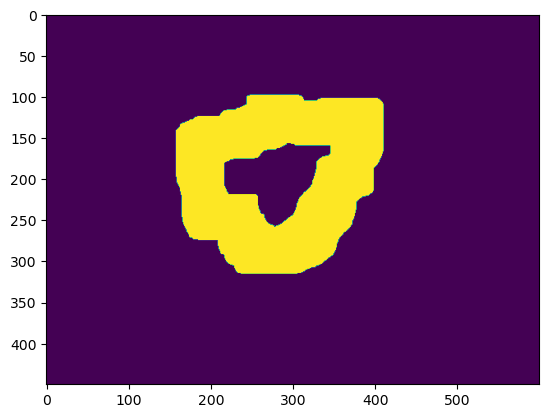

TypeError: imsave() got an unexpected keyword argument 'color_mode'

In [ ]:


image_dir = '../dataset/images/'
# im_n = imgPath
imagepath = image_dir+'/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}
im_n=['../dataset/images/ISIC_0024315.jpg']
for i in range(1):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    print(ll)
    # print(str(labelPath), type(ll))
    imagePAth = imagepath+str(ll)+'.jpg'
    labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    # Image.open
    # mask = Image.load_img(labelPath, color_mode='grayscale')
    # mask = Image.open(labelPath)
    mask = cv2.imread(labelPath)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) 
    print(mask)
    # mask = Image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    # im = image.load_img(im_n[i], target_size=(224, 224))
    # im = image.img_to_array(im)
    t = cv2.imread(im_n[i])
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    # plt.imshow(img_with_contours)
    # plt.show()

    m = cv2.imread(labelPath, 0) 
    d = 50
    kernel = np.ones((d, d), np.uint8) 
    img_dilation = cv2.dilate(m, kernel, iterations=1) 
    img_erode = cv2.erode(m, kernel, iterations=1) 
    m = img_dilation - img_erode
    # cv2.imshow('Dilation', img_dilation) 
    # mask_contours, _ = cv2.findContours((img_with_contours * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask_contours_dl, _ = cv2.findContours((img_dilation * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(img_with_contours, mask_contours_d,  -1, (255, 255, 255), -1)
    cv2.drawContours(img_with_contours, mask_contours_dl,  -1, (255,255,0),2)
    # cv2.drawContours(img_with_contours, mask_contours_dl,  -1, (255,255,255),50)
    mask_contours_er, _ = cv2.findContours((img_erode * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(img_with_contours, mask_contours_d,  -1, (255, 255, 255), -1)
    cv2.drawContours(img_with_contours, mask_contours_er,  -1, (255,255,0), 2)
    cv2.drawContours(img_with_contours, mask_contours,  -1, (0,0,255), 2)

    plt.imshow(img_with_contours)
    # plt.imshow(m, )
    # plt.show()
    # plt.imsave('/mnt/c/Users/rbasak2/Downloads/'+str(ll)+'_mask.jpg', m, color_mode='grayscale' )

    # plt.hold()
    # plt.imshow(m)
    # hold on
    # print(img_with_contours)
    # plt.show()
    
    




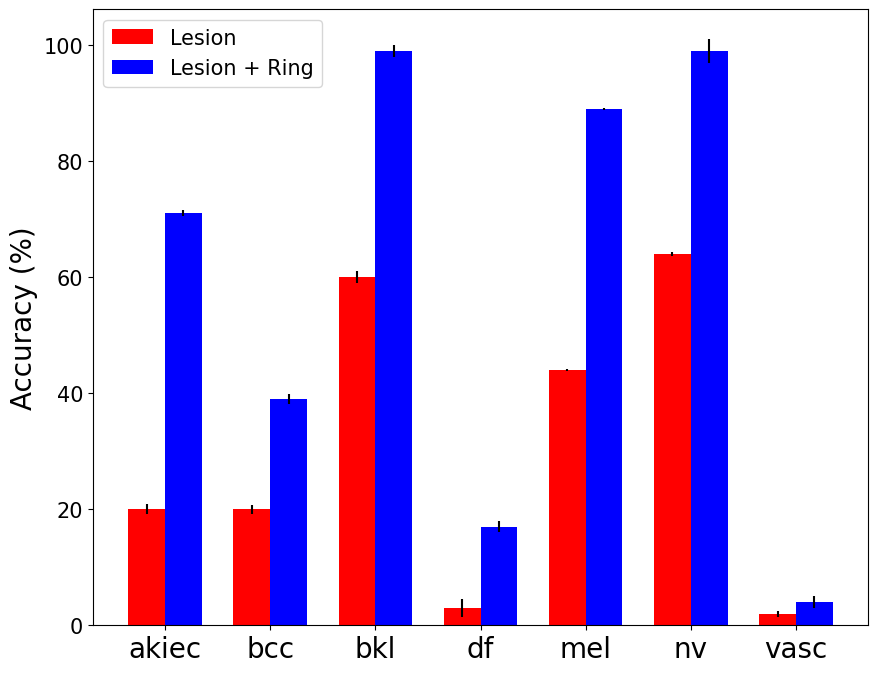

In [50]:
dx = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']

# Sample data
# categ/ories = ['A', 'B', 'C', 'D']
dataset1 = [20, 20, 60, 3, 44, 64, 2]
dataset2 = [71,39,99,17,89,99,4]

yerr1 = [.9,.8,1,1.5,.2,.3,0.5]
yerr2 = [.5,.8,1,1,.2,2.12,1.1]
# Create an array for x-axis positions
x = np.arange(len(dx))

# Width of the bars
width = 0.35

# Create the bar plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
rects1 = ax.bar(x - width/2, dataset1, width, label='Lesion', color = 'red')
ax.errorbar(x - width/2, dataset1,yerr1, fmt = ' ', color ='k')
rects2 = ax.bar(x + width/2, dataset2, width, label='Lesion + Ring', color = 'blue')
ax.errorbar(x + width/2, dataset2,yerr2, fmt = ' ', color ='k')

# plt.figure(figsize=(16, 8))
# fig, ax=plt.subplots()
# Add labels and title
plt.rcParams.update({'font.size': 15})
ax.set_xticks(x)
ax.set_xticklabels(dx, size = 20)
ax.set_ylabel('Accuracy (%)', size = 20)
ax.set_title('')
ax.legend()
plt.savefig('/mnt/c/Users/rbasak2/Downloads/acc_errorbar.jpg', dpi = 200)
# Display the plot
plt.show()


In [90]:
class	sensitivity	specificity
0	0	0.999484	0.714286
1	1	0.996308	0.394231
2	2	0.992239	0.994898
3	3	0.998985	0.172414
4	4	0.985393	0.886364
5	5	0.828125	0.995588
6	6	0.997972	0.035714

SyntaxError: invalid syntax (1215408191.py, line 1)

In [42]:
np.std([44.3,48,34,37,41])

np.float64(4.995838267998674)

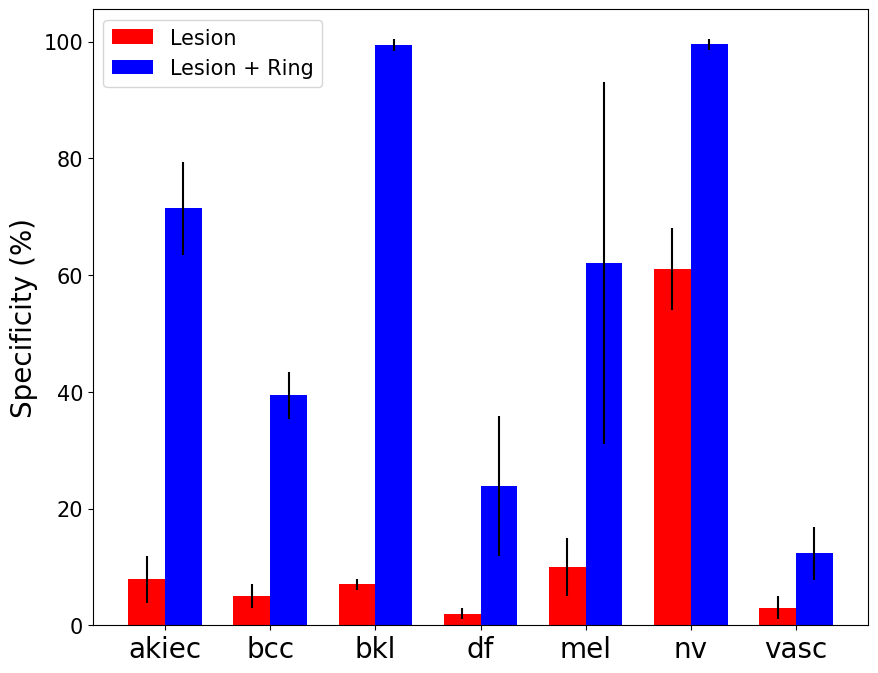

In [ ]:
# class	sensitivity	specificity
# 0	0	0.960248	0.079365
# 1	1	0.937764	0.057692
# 2	2	0.877494	0.076531
# 3	3	0.988838	0.000000
# 4	4	0.874157	0.100000
# 5	5	0.359375	0.612500
# 6	6	0.976166	0.000000

dx = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']

# Sample data
# categ/ories = ['A', 'B', 'C', 'D']
dataset1 = [7.9, 5, 7, 2, 10, 61, 3]
dataset2 = [71.4,39.4,99.4,23.9,62,99.5,12.3]
yerr1 = [4,2,1,1,5,7,2]
yerr2 = [8,4,1,12,31,1,4.6] 
# Create an array for x-axis positions
x = np.arange(len(dx))

# Width of the bars
width = 0.35

# Create the bar plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
rects1 = ax.bar(x - width/2, dataset1, width, label='Lesion', color = 'red')
ax.errorbar(x - width/2, dataset1,yerr1, fmt = ' ', color ='k')
rects2 = ax.bar(x + width/2, dataset2, width, label='Lesion + Ring', color = 'blue')
ax.errorbar(x + width/2, dataset2,yerr2, fmt = ' ', color ='k')

plt.rcParams.update({'font.size': 15})

# plt.figure(figsize=(16, 8))
# fig, ax=plt.subplots()
# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(dx, size = 20)
ax.set_ylabel('Specificity (%)', size = 20)
ax.set_title('')
ax.legend()
plt.savefig('/mnt/c/Users/rbasak2/Downloads/specificity_errorbar.jpg', dpi = 200)
# Display the plot
plt.show()


In [33]:
np.mean([83,87,85,85,83]), np.std([83,87,85,85,83])

(np.float64(84.6), np.float64(1.4966629547095764))

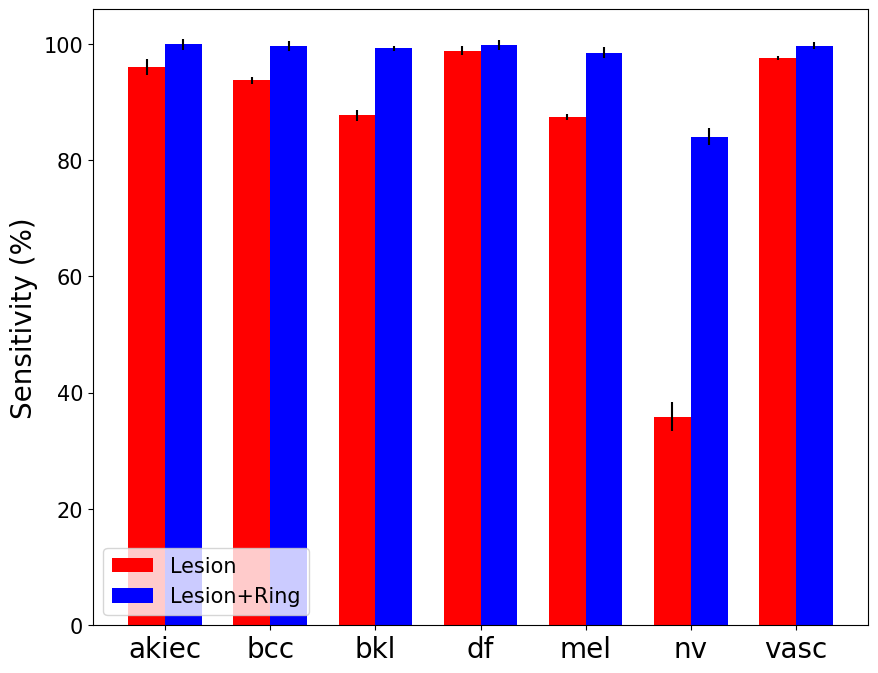

In [35]:
# class	sensitivity	specificity
# 0	0	0.960248	0.079365
# 1	1	0.937764	0.057692
# 2	2	0.877494	0.076531
# 3	3	0.988838	0.000000
# 4	4	0.874157	0.100000
# 5	5	0.359375	0.612500
# 6	6	0.976166	0.000000

dx = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']

# Sample data
# categ/ories = ['A', 'B', 'C', 'D']
dataset1 = [96, 93.7, 87.7, 98.8, 87.4, 35.9, 97.6]
dataset2 = [99.9,99.6,99.2,99.8,98.5,84,99.7]

yerr1 =[1.4,0.6,0.9,0.8,.5,2.45,0.3]
yerr2 = [1,0.9,0.5,0.9,1,1.45,0.6]
# Create an array for x-axis positions
x = np.arange(len(dx))
# Width of the bars
width = 0.35

# Create the bar plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax.bar(x-width/2, dataset1,width, color = 'red', label='Lesion')
ax.errorbar(x-width/2, dataset1, yerr=yerr1,  fmt=" ", color="k")
ax.bar(x+width/2, dataset2,width, color = 'blue', label='Lesion+Ring')
ax.errorbar(x+width/2, dataset2, yerr=yerr2,  fmt=" ", color="k")
# rects2 = ax.bar(x + width/2, dataset2, width, label='Lesion + Ring', color = 'blue')
# rects2 = ax.errorbar(x + width/2, dataset2, yerr=xerr1, fmt = 'o', label='Lesion + Ring', color = 'blue')

# plt.figure(figsize=(16, 8))
# fig, ax=plt.subplots()
# Add labels and title
plt.rcParams.update({'font.size': 15})
ax.set_xticks(x)
ax.set_xticklabels(dx, size = 20)
# ax.set_ticklabels(dx, size = 20)
ax.set_ylabel('Sensitivity (%)', size = 20)
ax.set_title('')
ax.legend(loc = 'best')
plt.savefig('/mnt/c/Users/rbasak2/Downloads/sensitivity_errorbar.jpg', dpi = 200)
# Display the plot
plt.show()


In [2]:
import numpy as np
np.std([89,89,35,14,87])
np.std([13,26,34,40,4])

np.float64(13.26046756340062)

0029209
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


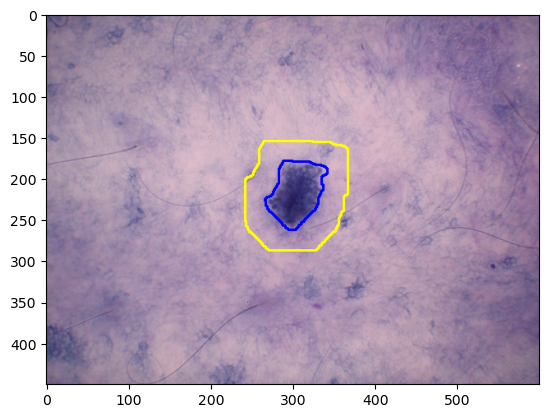

In [8]:


image_dir = '../dataset/images/'
# im_n = imgPath
imagepath = image_dir+'/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}
im_n=['../dataset/images/ISIC_0029209.jpg']
#im_n=['../dataset/images/ISIC_0032244.jpg']
for i in range(1):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    print(ll)
    # print(str(labelPath), type(ll))
    imagePAth = imagepath+str(ll)+'.jpg'
    labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    # Image.open
    # mask = Image.load_img(labelPath, color_mode='grayscale')
    # mask = Image.open(labelPath)
    mask = cv2.imread(labelPath)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) 
    print(mask)
    # mask = Image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    # im = image.load_img(im_n[i], target_size=(224, 224))
    # im = image.img_to_array(im)
    t = cv2.imread(im_n[i])
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    # plt.imshow(img_with_contours)
    # plt.show()

    m = cv2.imread(labelPath, 0) 
    d = 50
    kernel = np.ones((d, d), np.uint8) 
    img_dilation = cv2.dilate(m, kernel, iterations=1) 
    img_erode = cv2.erode(m, kernel, iterations=1) 
    m = img_dilation - img_erode
    # cv2.imshow('Dilation', img_dilation) 
    # mask_contours, _ = cv2.findContours((img_with_contours * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask_contours_dl, _ = cv2.findContours((img_dilation * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(img_with_contours, mask_contours_d,  -1, (255, 255, 255), -1)
    cv2.drawContours(img_with_contours, mask_contours_dl,  -1, (255,255,0),2)
    # cv2.drawContours(img_with_contours, mask_contours_dl,  -1, (255,255,255),50)
    mask_contours_er, _ = cv2.findContours((img_erode * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(img_with_contours, mask_contours_d,  -1, (255, 255, 255), -1)
    cv2.drawContours(img_with_contours, mask_contours_er,  -1, (255,255,0), 2)
    cv2.drawContours(img_with_contours, mask_contours,  -1, (0,0,255), 2)

    plt.imshow(img_with_contours)
    # plt.imshow(m, )
    # plt.show()
    plt.imsave('/mnt/c/Users/rbasak2/Downloads/'+str(ll)+'50pixels.jpg',img_with_contours )

    # plt.hold()
    # plt.imshow(m)
    # hold on
    # print(img_with_contours)
    # plt.show()
    
    




0029363
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


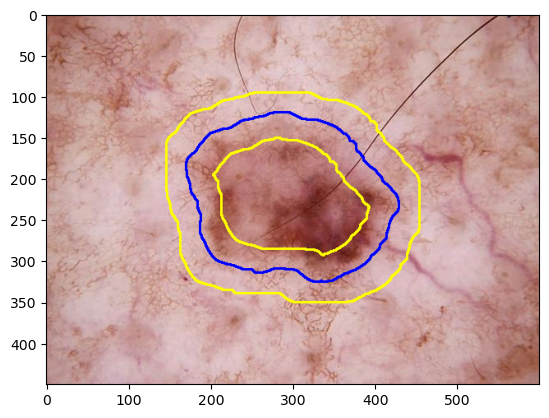

In [4]:


import glob
import cv2

image_dir = 'mel'
imgPath = []
for img in glob.glob(image_dir+'/*_or.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(img)
# print((imgPath))

# image_dir = '../dataset/images/'
im_n = imgPath
imagepath = image_dir+'/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

# features ={}
# im_n=['../dataset/images/ISIC_0024315.jpg']
for i in range(1):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    print(ll)
    # print(str(labelPath), type(ll))
    imagePAth = imagepath+str(ll)+'.jpg'
    labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    # Image.open
    # mask = Image.load_img(labelPath, color_mode='grayscale')
    # mask = Image.open(labelPath)
    mask = cv2.imread(labelPath)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) 
    print(mask)
    # mask = Image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    # im = image.load_img(im_n[i], target_size=(224, 224))
    # im = image.img_to_array(im)
    t = cv2.imread(im_n[i])
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    # plt.imshow(img_with_contours)
    # plt.show()

    m = cv2.imread(labelPath, 0) 
    d = 50
    kernel = np.ones((d, d), np.uint8) 
    img_dilation = cv2.dilate(m, kernel, iterations=1) 
    img_erode = cv2.erode(m, kernel, iterations=1) 
    m = img_dilation - img_erode
    # cv2.imshow('Dilation', img_dilation) 
    # mask_contours, _ = cv2.findContours((img_with_contours * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask_contours_dl, _ = cv2.findContours((img_dilation * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(img_with_contours, mask_contours_d,  -1, (255, 255, 255), -1)
    cv2.drawContours(img_with_contours, mask_contours_dl,  -1, (255,255,0),2)
    # cv2.drawContours(img_with_contours, mask_contours_dl,  -1, (255,255,255),50)
    mask_contours_er, _ = cv2.findContours((img_erode * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(img_with_contours, mask_contours_d,  -1, (255, 255, 255), -1)
    cv2.drawContours(img_with_contours, mask_contours_er,  -1, (255,255,0), 2)
    cv2.drawContours(img_with_contours, mask_contours,  -1, (0,0,255), 2)

    plt.imshow(img_with_contours)
    # plt.imshow(m, )
    # plt.show()
    # plt.imsave('/mnt/c/Users/rbasak2/Downloads/'+str(ll)+'_mask.jpg', m, color_mode='grayscale' )

    # plt.hold()
    # plt.imshow(m)
    # hold on
    # print(img_with_contours)
    plt.show()
    
    


